![lop](../../images/logo_diive1_128px.png)

# **Monthly aggregation matrix**
`.resample_to_monthly_agg_matrix()`

---
**Notebook version**: `1` (23 Mar 2025)  
**Author**: Lukas Hörtnagl (holukas@ethz.ch)

</br>

# **Description**

- Calculate a matrix with years as y, months as x and z-values as the aggregated values of a time series
- This example uses air temperature data, recorded at 30MIN time resolution between 1997 and 2022 from the ICOS Class 1 ecosystem station [CH-Dav](https://www.swissfluxnet.ethz.ch/index.php/sites/site-info-ch-dav/)

</br>

# **Imports**

In [1]:
import diive as dv

import importlib.metadata
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import warnings
warnings.simplefilter("ignore", UserWarning)
from diive.configs.exampledata import load_exampledata_parquet_long
version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")

diive version: v0.87.0


</br>

# **Docstring**

In [2]:
help(dv.resample_to_monthly_agg_matrix)

Help on function resample_to_monthly_agg_matrix in module diive.core.times.resampling:

resample_to_monthly_agg_matrix(series: pandas.core.series.Series, agg: str, ranks: bool = False) -> pandas.core.frame.DataFrame
    Resample to monthly aggregation across years, store results in a matrix.
    
    Args:
        series: Time series with timestamp.
        agg: Method for monthly aggregation, e.g. *agg='mean'*.
            Allowed methods: 'mean', 'median', 'sum', 'max', 'min', 'std', 'skew'.
        ranks: Returns ranks of aggregation values in the matrix.
            For example, if *agg='mean'* and *ranks=True*, then the highest value
            in each month across years is attributed rank 1, the second highest rank 2, etc.
            For measurements such as air temperature, rank 1 means that the respective month
            was the warmest across all years.
    
    Returns:
        Matrix with resampled data. The resulting dataframe has YEAR as index and MONTH as columns.



</br>

# **Load example data**

In [3]:
df = load_exampledata_parquet_long()
series = df['Tair_f'].copy()
series

Loaded .parquet file F:\Sync\luhk_work\20 - CODING\21 - DIIVE\diive\diive\configs\exampledata\local\exampledata_PARQUET_CH-DAV_FP2022.5_1997-2022_ID20230206154316_30MIN.parquet (0.056 seconds).
    --> Detected time resolution of <30 * Minutes> / 30min 


TIMESTAMP_MIDDLE
1997-01-01 00:15:00   -7.850000
1997-01-01 00:45:00   -8.130000
1997-01-01 01:15:00   -7.890000
1997-01-01 01:45:00   -8.490000
1997-01-01 02:15:00   -8.130000
                         ...   
2022-12-31 21:45:00    3.463333
2022-12-31 22:15:00    5.283333
2022-12-31 22:45:00    5.536667
2022-12-31 23:15:00    4.963333
2022-12-31 23:45:00    6.490000
Freq: 30min, Name: Tair_f, Length: 455808, dtype: float64

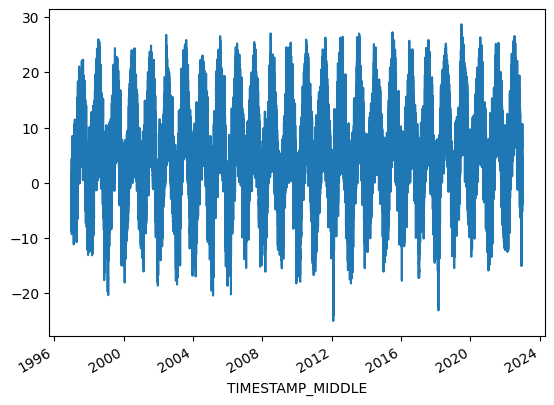

In [4]:
series.plot(x_compat=True);

</br>

# **Matrix of monthly means**

In [5]:
monthly_means = dv.resample_to_monthly_agg_matrix(series=series, agg='mean', ranks=False)
monthly_means

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
YEAR,,,,,,,,,,,,
1997,-1.048970,-0.972033,1.083761,0.208409,6.939243,9.481293,10.018640,12.757543,10.715623,5.100085,1.029179,-2.588663
1998,-2.750983,0.710472,-1.602160,1.928246,7.645235,10.585466,12.052143,12.308743,7.670540,3.512677,-3.862338,-3.226645
1999,-2.317923,-6.586344,-0.222120,1.786626,8.289269,8.508229,12.233122,11.680034,10.476056,5.617343,-2.040942,-3.795968
2000,-4.825514,-2.451578,-0.806155,3.380472,8.327979,11.734290,9.608636,12.884875,9.342816,5.854016,-0.088897,-0.134976
2001,-3.378940,-2.802271,1.485125,0.238445,9.191877,8.477605,12.028429,13.233104,4.983676,8.535933,-1.129704,-6.011650
2002,-2.149332,-0.540505,0.778731,2.184491,7.018960,12.680555,11.718050,10.974155,6.690084,4.798905,1.028384,-1.636018
2003,-5.477401,-6.125326,1.007974,2.323719,8.431911,15.103417,13.011399,15.625331,8.787521,2.137183,2.710714,-1.650337
2004,-5.426992,-3.185022,-1.534205,2.412874,4.966612,9.600120,11.636362,12.069055,9.011695,7.043860,-0.454167,-2.088527
2005,-5.101675,-8.453747,-1.198996,2.735083,7.378523,11.528680,11.685674,9.631435,9.341301,7.183058,-1.018335,-6.284229


</br>

# **Matrix of monthly means as ranks**
- rank `1` means that the respective month was the warmest across all years, rank `2` means the second warmest, and so on

In [6]:
monthly_means_ranks = dv.resample_to_monthly_agg_matrix(series=series, agg='mean', ranks=True)
monthly_means_ranks

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
YEAR,,,,,,,,,,,,
1997,2.0,9.0,5.0,26.0,18.0,23.0,24.0,13.0,3.0,15.0,11.0,16.0
1998,10.0,1.0,19.0,21.0,12.0,16.0,14.0,16.0,19.0,25.0,26.0,17.0
1999,8.0,22.0,13.0,22.0,9.0,25.0,13.0,19.0,5.0,13.0,25.0,20.0
2000,17.0,14.0,15.0,8.0,8.0,7.0,26.0,12.0,10.0,11.0,15.0,4.0
2001,12.0,15.0,3.0,25.0,2.0,26.0,15.0,9.0,26.0,2.0,22.0,25.0
2002,7.0,6.0,8.0,19.0,17.0,6.0,19.0,21.0,23.0,18.0,12.0,8.0
2003,22.0,21.0,6.0,17.0,6.0,1.0,9.0,1.0,17.0,26.0,5.0,9.0
2004,21.0,16.0,18.0,15.0,22.0,21.0,21.0,17.0,13.0,6.0,18.0,12.0
2005,19.0,25.0,16.0,14.0,15.0,10.0,20.0,25.0,11.0,5.0,20.0,26.0


</br>

# **Matrix of monthly maxima as ranks**
- rank `1` means that the respective month had the highest maximum across all years, rank `2` means the second highest, and so on

In [7]:
monthly_max_ranks = dv.resample_to_monthly_agg_matrix(series=series, agg='max', ranks=True)
monthly_max_ranks

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
YEAR,,,,,,,,,,,,
1997,12.0,13.0,13.0,26.0,21.0,26.0,24.0,20.0,5.0,13.0,7.0,23.0
1998,4.0,2.0,4.0,14.0,16.0,12.0,7.0,6.0,8.0,24.0,24.0,13.0
1999,2.0,21.0,18.0,16.0,11.0,25.0,13.0,19.0,13.0,18.0,6.0,16.0
2000,22.0,18.0,21.0,11.0,20.0,16.0,17.0,14.0,18.0,21.0,23.0,6.0
2001,17.0,15.0,2.0,24.0,12.0,20.0,19.0,13.0,25.0,1.0,21.0,25.0
2002,1.0,12.0,19.0,20.0,18.0,3.0,22.0,24.0,24.0,23.0,13.0,19.0
2003,18.0,24.0,7.0,2.0,8.0,15.0,11.0,4.0,9.0,19.0,12.0,9.0
2004,19.0,10.0,3.0,17.0,15.0,22.0,21.0,21.0,16.0,3.0,2.0,11.0
2005,11.0,26.0,8.0,9.0,4.0,14.0,3.0,22.0,14.0,6.0,5.0,26.0


</br>

# **End of notebook**

In [8]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished {dt_string}")

Finished 2025-03-23 22:58:30
